In [1]:
import tiktoken
from langchain import OpenAI
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from dotenv import load_dotenv

load_dotenv()

openai_api_key = os.getenv("CHATGPT_API_KEY")
#llm = OpenAI(temperature=0, model="gpt-3.5-turbo", openai_api_key=openai_api_key)
tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")
# word_splitter = TokenTextSplitter(chunk_overlap=0)

In [4]:
def get_token_count(text):
    text_token_count = len(tokenizer.encode(text))
    return text_token_count

def create_single_doc(text):
    return Document(page_content=text)
    
def create_multiple_docs(text, chunk_size=4000, overlap=0):
    text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=chunk_size, chunk_overlap=overlap, length_function=get_token_count)
    docs = text_splitter.create_documents([text])
    return docs


In [5]:
text = open("logs/dlt/dlt_raw.txt", "r").read()
# single_doc = create_single_doc(text)
# print("token count of single doc: ", get_token_count(single_doc.page_content))
docs = create_multiple_docs(text)
# for doc in docs:
#     print(get_token_count(doc.page_content))
len(docs)

24443

In [8]:
from langchain.vectorstores import FAISS
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.chains.summarize import load_summarize_chain

import numpy as np
from sklearn.cluster import KMeans
# from sklearn.cluster import OPTICS
# db = OPTICS(eps=3, min_samples=30).fit(X)

In [9]:
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

vectors = embeddings.embed_documents([x.page_content for x in docs])

In [14]:
num_clusters = 11

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

/home/amos1999/.cache/pypoetry/virtualenvs/logslicer-He69jZ8S-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


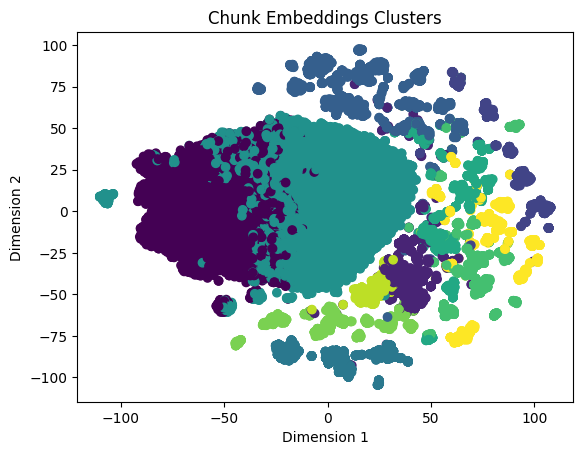

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(np.array(vectors))

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Chunk Embeddings Clusters')
plt.show()

In [19]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):
    
    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)
    
    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)
    
    # Append that position to your closest indices list
    closest_indices.append(closest_index)

selected_indices = sorted(closest_indices)
selected_indices

[3388, 3843, 4565, 14545, 15322, 18675, 20963, 21369, 21395, 21693, 22696]

In [20]:
docs[3388]

Document(page_content="Tue Oct 10 12:43:50 2023 1109.1716 19 HPA UDSV UDSV 962643 log info verbose 1 [mediator_impl.cpp:156] Queue is empty, arming s3_server_timer_.\nTue Oct 10 12:43:50 2023 1109.1794 87 HPA UTH UTH 962646 log info verbose 1 [mediator_impl.cpp:321] UdsFirewallProxy is uninitialized or unavailable, forward diagnostic message to router.\nTue Oct 10 12:43:50 2023 1109.1805 20 HPA UDSV UDSV 962643 log info verbose 1 [socket_handler.cpp:135] Received a UDS message: 'DiagnosticMessage[payload_length:65539]'.\nTue Oct 10 12:43:50 2023 1109.1805 21 HPA UDSV UDSV 962643 log info verbose 1 [mediator_impl.cpp:101] Got request to handle SID: 'TransferData'.\nTue Oct 10 12:43:50 2023 1109.1805 22 HPA UDSV UDSV 962643 log info verbose 1 [mediator_impl.cpp:132] Processing SID: 'TransferData'.\nTue Oct 10 12:43:50 2023 1109.1805 23 HPA UDSV UDSV 962643 log info verbose 1 [service_handler_base.cpp:122] ArmP2StarTimer (22 ms).\nTue Oct 10 12:43:50 2023 1109.1805 24 HPA UDSV UDSV 962643